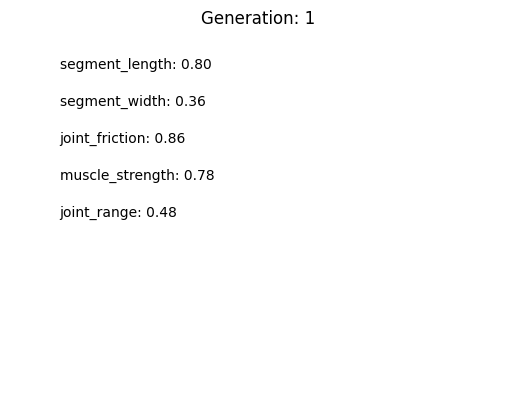

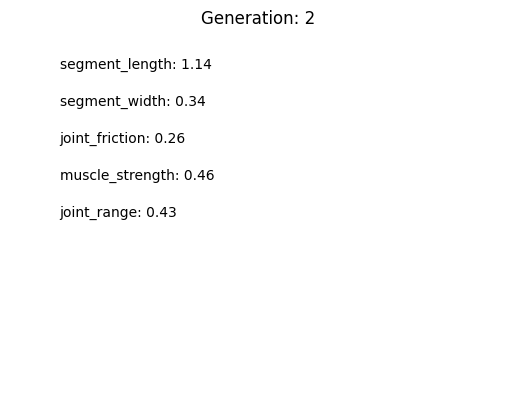

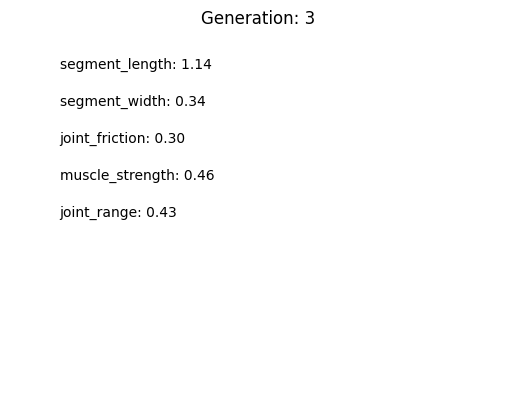

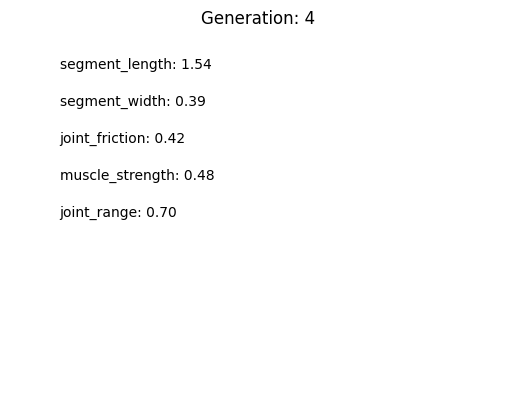

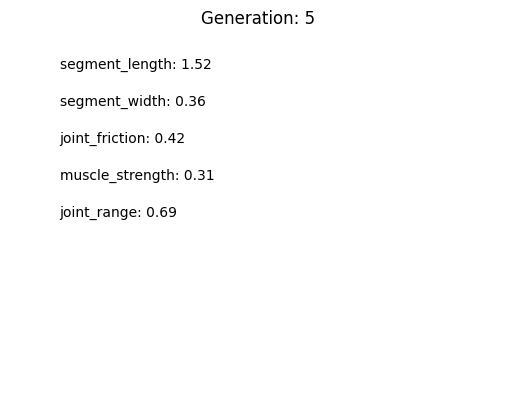

Number of generations: 5
Best creatures:
Generation: 1
{'segment_length': 0.8026399873346703, 'segment_width': 0.3555776239709413, 'joint_friction': 0.8583165524246049, 'muscle_strength': 0.7809302804849227, 'joint_range': 0.4790026241392024}

Generation: 2
{'segment_length': 1.1395119262096678, 'segment_width': 0.3439331541027171, 'joint_friction': 0.2589524997198357, 'muscle_strength': 0.46479616231857324, 'joint_range': 0.4290858929768744}

Generation: 3
{'segment_length': 1.1395119262096678, 'segment_width': 0.3439331541027171, 'joint_friction': 0.3022080132592447, 'muscle_strength': 0.46479616231857324, 'joint_range': 0.4290858929768744}

Generation: 4
{'segment_length': 1.5386864204425605, 'segment_width': 0.3908923076727383, 'joint_friction': 0.4233232523470284, 'muscle_strength': 0.4829627091636364, 'joint_range': 0.6976618320429135}

Generation: 5
{'segment_length': 1.517185326282713, 'segment_width': 0.3587332805450417, 'joint_friction': 0.4160544292988627, 'muscle_strength':

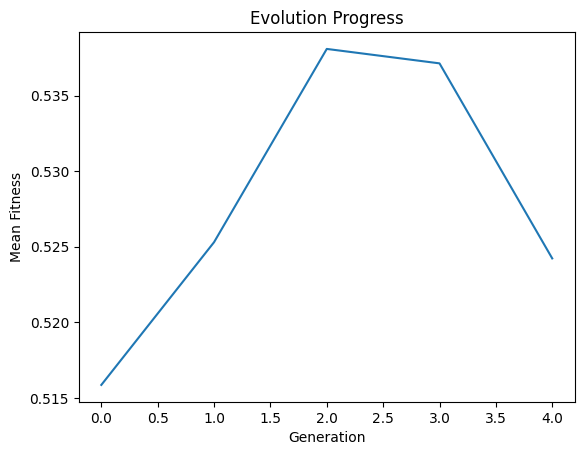

In [1]:
import random
import time
import matplotlib.pyplot as plt

# Genetic Algorithm Parameters
mutation_rate = 0.01  # Probability of mutation
mutation_range = 0.1  # Range of mutation
population_size = 100
num_generations = 5

# Gene Spec Ranges
gene_spec = {
    'segment_length': (0.5, 2.0),  # Adjust the range for segment length
    'segment_width': (0.1, 0.5),  # Adjust the range for segment width
    'joint_friction': (0.1, 1.0),  # Adjust the range for joint friction
    'muscle_strength': (0.1, 1.0),  # Adjust the range for muscle strength
    'joint_range': (0.2, 1.0)  # Adjust the range for joint range
}

# Initialize population
population = []
for _ in range(population_size):
    creature = {}
    for gene, (min_value, max_value) in gene_spec.items():
        creature[gene] = random.uniform(min_value, max_value)
    population.append(creature)

# Evaluation function (you need to define your own fitness function)
def evaluate_fitness(creature):
    # Calculate fitness based on the specific characteristics or behavior of the creature
    return random.uniform(0, 1)

# Track evolution progress
mean_fitness_values = []
best_creatures = []

# Main evolution loop
for generation in range(num_generations):
    # Evaluate fitness for each creature in the population
    fitness_values = [evaluate_fitness(creature) for creature in population]

    # Record mean fitness for the current generation
    mean_fitness = sum(fitness_values) / len(fitness_values)
    mean_fitness_values.append(mean_fitness)

    # Track the best creature in the current generation
    best_creature = population[fitness_values.index(max(fitness_values))]
    best_creatures.append(best_creature)

    # Selection
    selected_population = random.choices(population, weights=fitness_values, k=population_size)

    # Reproduction (crossover and mutation)
    new_population = []
    for _ in range(population_size):
        parent1, parent2 = random.choices(selected_population, k=2)
        offspring = {}
        for gene, value in parent1.items():
            if random.random() < mutation_rate:
                mutated_value = value + random.uniform(-mutation_range, mutation_range)
                mutated_value = max(gene_spec[gene][0], min(mutated_value, gene_spec[gene][1]))  # Ensure value is within the range
                offspring[gene] = mutated_value
            else:
                offspring[gene] = value
        new_population.append(offspring)

    # Update population with the new generation
    population = new_population

    # Plot current best creature
    plt.clf()
    plt.title(f"Generation: {generation+1}")
    for gene, value in best_creature.items():
        plt.text(0.1, 0.9 - 0.1 * list(best_creature.keys()).index(gene), f"{gene}: {value:.2f}", transform=plt.gca().transAxes)
    plt.axis('off')
    plt.pause(0.1)

# Print and plot results
print("Number of generations:", num_generations)
print("Best creatures:")
for i, creature in enumerate(best_creatures):
    print("Generation:", i+1)
    print(creature)
    print()

plt.plot(range(len(mean_fitness_values)), mean_fitness_values)
plt.xlabel('Generation')
plt.ylabel('Mean Fitness')
plt.title('Evolution Progress')
plt.show()
